## Samples from SVV, PAEK membranes

BM26 (SAXS/WAXS) ESRF 11/03/2022  
**path:** /data/id13/inhouse12/alexey/2022_03_BM26/  
### Setup
**Energy =** 12 kEv  
**$\lambda$ =** 1.2398/13 = 0.10332 nm  
**WAXS** detector is Pilatus 300K-W  
**SAXS** detector Pilatus 1M at 2.7 m   

### Sample list  

in capillaries filled with water, sealed with wax  
from left to right:  
60/40; 70/30; 85/15; 80/20; Aq; 60/40PBI; 80/20PBI  

<img src="./samples.jpg" width="600" >  



### Membranes preparation  
Cutting into pieces around 2x0.5 cm, weighting ($m_0$);  
drying in vacuum for 2 hours at 150 C, weighting again ($m_1$);  
dwelling in water for 12 hours, weighting again ($m_2$)  
$m_2$ for almost all the samples are missing, as half of them was spent for ID02 measurements, the rest of them crumble in water.

| sample                 | $m_0, g$ | $m_1, g$ | %      | $m_2, g$ | %  |  
| ---------------------- | -------- | -------- | ------ | -------- | -- |  
| **60/40 (1)**          | 0.02864  | 0.02485  | 15.25  | 0.03207  | 29 |  
| **60/40 (2)**          | 0.02493  | 0.02154  | 13.59  |          |    |  
| **60/40 with PBI (1)** | 0.01676  | 0.01442  | 13.96  | 0.01987  | 18.5 |  
| **60/40 with PBI (2)** | 0.01667  | 0.01423  | 14.63  |          |    |  
| **80/20 (1)**          | 0.02845  | 0.02432  | 14.51  |          |    |  
| **80/20 (2)**          | 0.03038  | 0.02584  | 14.94  |          |    |  
| **80/20 with PBI (1)** | 0.02124  | 0.01820  | 14.31  |          |    |  
| **80/20 with PBI (2)** | 0.01720  | 0.01475  | 14.24  |          |    |  
| **85/15 (1)**          | 0.02713  | 0.02282  | 15.88  |          |    |  
| **85/15 (2)**          | 0.02294  | 0.01830  | 20.22  |          |    |  
| **70/30  (1)**         | 0.01111  | 0.00932  | 16.29  |          |    |  
| **70/30  (2)**         | 0.01209  | 0.01021  | 15.62  |          |    |  
| **Aquivion  (1)**      | 0.01340  | 0.01263  | 5.74   | 0.0204   | 52 |  
| **Aquivion  (2)**      | 0.01445  | 0.01349  | 6.64   |          |    |  



---

## Data processing

In [1]:
%matplotlib nbagg

In [2]:
import pyFAI
import pyFAI.test.utilstest
import fabio
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
import pandas as pd

In [3]:
cd /data/id13/inhouse12/alexey/2022_03_BM26/data/data

/gpfs/jazzy/data/id13/inhouse12/alexey/2022_03_BM26/data/data


In [4]:
samples = ['M6040', 'M7030', 'M8515', 'M8020', 'MAQ', 'MAQ_bubble', 'M6040pbi', 'M8020pbi',  'MH2O']
for sample in samples:
    SAXS_path = './'+sample+'_SAXS.dat'
    SAXS_name = sample+'_SAXS'
    read_dat_code = '''with open(SAXS_path) as file: 
    %s=pd.read_table(file, sep='\s+', skiprows = 23, names=['I'])'''
    exec(read_dat_code % (SAXS_name))
    
    WAXS_path = './'+sample+'_WAXS.dat'
    WAXS_name = sample+'_WAXS'
    read_dat_code = '''with open(WAXS_path) as file: 
    %s=pd.read_table(file, sep='\s+', skiprows = 23, names=['I'])'''
    exec(read_dat_code % (WAXS_name))

In [5]:
# bkg correction
M6040_WAXS*=1.135
M7030_WAXS*=1.05
M8515_WAXS*=1.09
M8020_WAXS*=0.675
MAQ_WAXS*=1.02
MAQ_bubble_WAXS*=1.7
M6040pbi_WAXS*=0.98
M8020pbi_WAXS*=0.99

M6040_SAXS*=0.9
M7030_SAXS*=0.85
M8515_SAXS*=0.65
M8020_SAXS*=0.57
MAQ_SAXS*=0.75
MAQ_bubble_SAXS*=0.8
M6040pbi_SAXS*=0.85

<IPython.core.display.Javascript object>


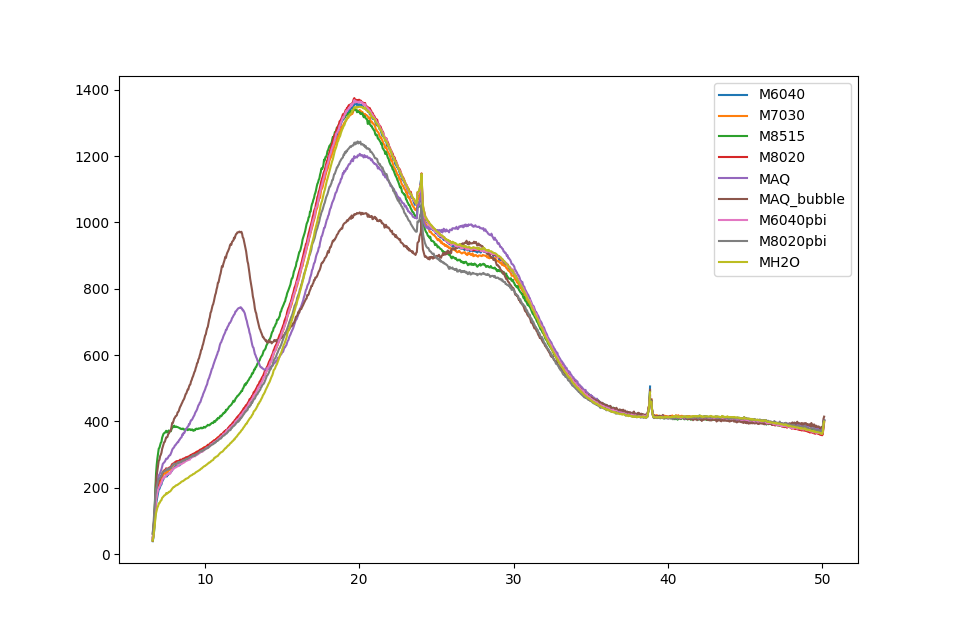

In [6]:
fig, ax = subplots()
for sample in samples:
    name = sample+'_WAXS'
    exec('ax.plot(%s, label=sample)' % name)
ax.legend()

<IPython.core.display.Javascript object>


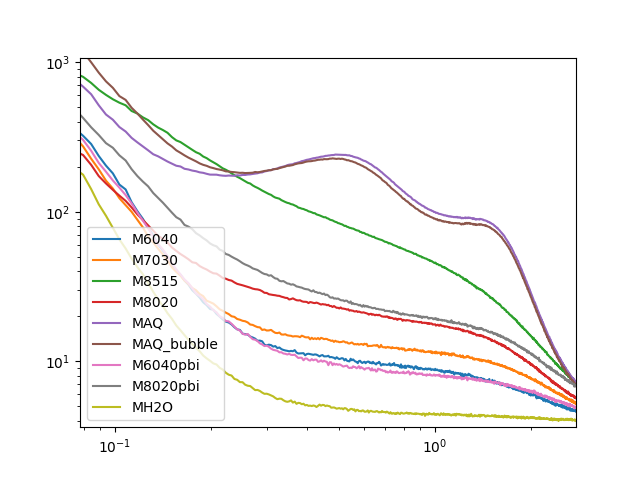

In [165]:
fig, ax = subplots()
for sample in samples:
    name = sample+'_SAXS'
    exec('ax.plot(%s, label=sample)' % name)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend();